Ce notebook est une tentative d'implémentation de deep learning sur la base de données de Drebin.

Les fichiers et le code ci-dessous est basé sur le cours à option de Machine Learning de l'HEIG-VD. Cette école en est la propriétaire et une autorisation d'utilisation m'a été accordée

k_fold_cross_validation.py
mlp_backprop_momentum.py

In [ ]:
PATH = 'feature_vectors_data.csv'

In [ ]:
def getData(path,n):
    '''
    :param path: Path to the file
    :param n : Number of rows to return
    :return: The DataFrame of size n
    '''
    training_data = pd.read_csv('feature_vectors_data.csv')

    df_majority = training_data[training_data.output == 0]
    df_minority = training_data[training_data.output == 1]
    df_majority_downsampled = resample(df_majority,replace=False,n_samples=len(df_minority),random_state=123)
    df_downsampled = pd.concat([df_majority_downsampled,df_minority])
    df = df_downsampled.reindex(np.random.permutation(df_downsampled.index))

    return df[:n]

In [ ]:
print(getData(PATH,200))

       Unnamed: 0  ... output
38901       38901  ...      0
11110       11110  ...      0
3565         3565  ...      0
40548       40548  ...      0
14425       14425  ...      0
...           ...  ...    ...
23953       23953  ...      0
4806         4806  ...      1
8579         8579  ...      0
17895       17895  ...      0
42204       42204  ...      1

[200 rows x 11 columns]


In [ ]:
#We want to create a dataframe 
df = getData(PATH,200)
label_encoder = LabelEncoder()
output_integer_encoded  = label_encoder.fit_transform(df['output'])
df_res = output_integer_encoded
df = df.loc[:,'s1':'output']

In [ ]:
df.describe()

,s1,s2,s3,s4,s5,s6,s7,s8,output
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3.11000,7.840000,5.580000,3.635000,5.685000,4.925000,5.225000,17.225000,0.485000
std,1.91474,6.626762,5.059803,3.340294,3.719536,3.515847,3.302865,28.920518,0.501029
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000
50%,2.00000,6.000000,4.000000,2.000000,5.000000,4.000000,5.000000,10.000000,0.000000
75%,5.00000,11.000000,8.000000,4.000000,8.000000,7.000000,7.000000,21.000000,1.000000
max,8.00000,28.000000,28.000000,38.000000,17.000000,16.000000,17.000000,287.000000,1.000000


In [ ]:
import mlp_backprop_momentum as mlp
import k_fold_cross_validation as cv

In [ ]:
N_INITS = 10
EPOCHS = 200
N_NEURONS = [2, 8, 64, 128, 256, 512]
LEARNING_RATE = 0.003
MOMENTUM = 0.1
dataset = df

In [ ]:
print(df.loc[:,:'output'])
print(df_res)

       s1  s2  s3  s4  s5  s6  s7  s8  output
34276   3   3   3   4   5   5   4   8       1
49136   2   5   1   2   1   1   2   0       1
29088   3   7   5   2   2   2   5   2       1
9940    3   4   2   2   4   3   4  48       0
23674   1   3  22   2   4   3   5  48       0
...    ..  ..  ..  ..  ..  ..  ..  ..     ...
39665   1   2   1   2   1   1   0   2       0
51864   2   4  10   5   7   6   8  10       1
2767    6  25  12  10  11  10   6  23       1
7632    2   4   3   3   4   3   4   0       1
10919   6  16  10   4   9   8  10  55       1

[200 rows x 9 columns]
[1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1
 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1
 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1
 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1]


In [ ]:
MSE = np.zeros((len(N_NEURONS), N_INITS, EPOCHS))

for i_h, h in enumerate(N_NEURONS):                                     # looping over the number of hidden neurons
    print('Testing', h, 'neurons...')
    nn = mlp.MLP([8,h,1], 'tanh')
    for i in np.arange(N_INITS):                                        # looping over the initializations
        nn.init_weights()
        
        
        MSE[i_h, i, :] = nn.fit((df.loc[:,'s1':'s8'], df_res),
                                learning_rate=LEARNING_RATE,
                                momentum=MOMENTUM,
                                epochs=EPOCHS)

Testing 2 neurons...
Testing 8 neurons...
Testing 64 neurons...
Testing 128 neurons...
Testing 256 neurons...
Testing 512 neurons...


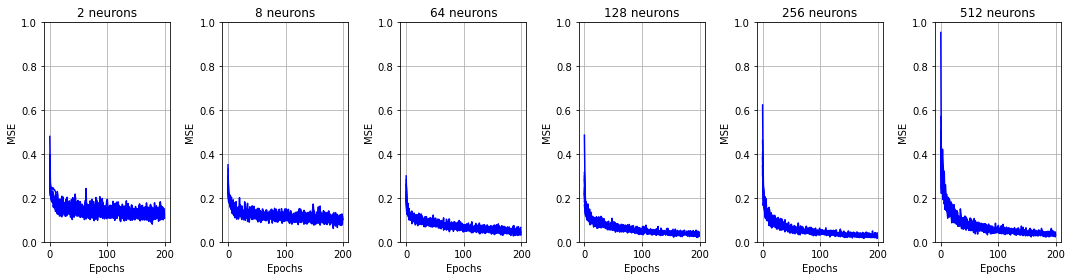

In [ ]:
pl.figure(figsize=(15,4))
p_count = 0
for n in np.arange(MSE.shape[0]):
    pl.subplot(1, MSE.shape[0], n+1)
    for i in np.arange(MSE.shape[1]):
        pl.plot(MSE[n,i,:], c='b')
    pl.ylim(0,1)
    pl.xlabel('Epochs')
    pl.ylabel('MSE')
    pl.title(str(N_NEURONS[n]) + ' neurons')
    pl.grid()
pl.tight_layout()

In [ ]:
EPOCHS = 3
K = 5
N_TESTS = 10
N_NEURONS = [2, 4, 6, 8, 10, 15, 20, 25, 30]

ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED ALL OF UNDER THIS HAVE TO BE CHECKED 

In [ ]:
MSE_train_mean = np.mean(MSE_train, axis=2)
MSE_test_mean = np.mean(MSE_test, axis=2)
MSE_train_sd = np.std(MSE_train, axis=2)
MSE_test_sd = np.std(MSE_test, axis=2)

v_min = min(np.min(MSE_train_mean), np.min(MSE_test_mean))
v_max = max(np.max(MSE_train_mean), np.max(MSE_test_mean))

n_rows = int(np.ceil(len(N_NEURONS)/3.0))
pl.figure(figsize=(12,3*n_rows))
for i_n, n in enumerate(N_NEURONS):
    pl.subplot(n_rows, min(3, len(N_NEURONS)), i_n+1)
    pl.fill_between(np.arange(EPOCHS), MSE_train_mean[i_n,:], MSE_train_mean[i_n,:]+MSE_train_sd[i_n,:], facecolor='blue', alpha=0.5, label='Train')
    pl.fill_between(np.arange(EPOCHS), MSE_train_mean[i_n,:], MSE_train_mean[i_n,:]-MSE_train_sd[i_n,:], facecolor='blue', alpha=0.5)
    pl.fill_between(np.arange(EPOCHS), MSE_test_mean[i_n,:], MSE_test_mean[i_n,:]+MSE_test_sd[i_n,:], facecolor='red', alpha=0.5, label='Test')
    pl.fill_between(np.arange(EPOCHS), MSE_test_mean[i_n,:], MSE_test_mean[i_n,:]-MSE_test_sd[i_n,:], facecolor='red', alpha=0.5)
    pl.ylim(0.95*v_min,0.5*v_max)
    pl.ylabel('MSE')
    pl.xlabel('Number of epochs')
    pl.title(str(K)+'-fold CV with '+str(n)+' hidden neurons')
    pl.legend()
    pl.grid()
pl.tight_layout()

NameError: ignored

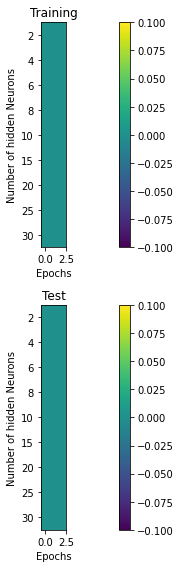

In [ ]:
pl.figure(figsize=(15,8))
pl.subplot(2,1,1)
pl.imshow(MSE_train_mean, vmin=np.min(MSE_train_mean), vmax=np.percentile(MSE_train_mean, 90), aspect=3, interpolation='nearest')
pl.yticks(np.arange(len(N_NEURONS)), N_NEURONS)
pl.xlabel('Epochs')
pl.ylabel('Number of hidden Neurons')
pl.title('Training')
pl.colorbar()
pl.subplot(2,1,2)
pl.imshow(MSE_test_mean, vmin=np.min(MSE_test_mean), vmax=np.percentile(MSE_test_mean, 90), aspect=3, interpolation='nearest')
pl.yticks(np.arange(len(N_NEURONS)), N_NEURONS)
pl.xlabel('Epochs')
pl.ylabel('Number of hidden Neurons')
pl.title('Test')
pl.colorbar()
pl.tight_layout()

In [ ]:
## Final model

In [ ]:
nn = mlp.MLP([8,10,1], 'tanh')

In [ ]:
MSE_train, MSE_test, conf_mat = cv.k_fold_cross_validation(nn,
                                                          datatest,
                                                          k=K,
                                                          learning_rate=LEARNING_RATE,
                                                          momentum=MOMENTUM,
                                                          epochs=100,
                                                          threshold=0.0)

TypeError: ignored

In [ ]:
print('MSE training: ', MSE_train)
print('MSE test: ', MSE_test)
print('Confusion matrix:')
print(conf_mat)